"""
    Title: Anomoly Detction in Time Series Data  
    Author: Sahil Sangani  
    Dataset: S&P 500 Stock Data  
    Dataset URL: https://www.kaggle.com/camnugent/sandp500?select=all_stocks_5yr.csv  
    Anomoly Type: Sudden Price Change  
    Data Range(Years): 1986 - 2020  
   
    
    =============================================
    Dataset Information
    =============================================
    File type: CSV (Comma Separated File)
    Number of Columns: 7 
        1. Date
        2. Open Price
        3. High Price 
        4. Low Price
        5. Close Price
        6. Volume 
        7. Company Name
"""

In [88]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
import tensorflow as tf

sns.set(style='whitegrid', palette='muted')
rcParams['figure.figsize'] = 14,8
np.random.seed(1)
tf.random.set_seed(1)

print('tensorflow version:',tf.__version__)


tensorflow version: 2.3.1


In [90]:
df1 = pd.read_csv("../input/sandp500/all_stocks_5yr.csv")
df1.head(2)


,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL


In [91]:
df1.drop(['open','high','low', 'volume', 'Name'], axis = 1)

,date,close
0,2013-02-08,14.75
1,2013-02-11,14.46
2,2013-02-12,14.27
3,2013-02-13,14.66
4,2013-02-14,13.99
...,...,...
619035,2018-02-01,77.82
619036,2018-02-02,76.78
619037,2018-02-05,73.83
619038,2018-02-06,73.27


In [92]:
'''
    The S&P 500 Index or the Standard & Poor's 500 Index is a market-capitalization-weighted index of the 500 largest U.S. publicly traded companies. The S&P is a float-weighted index, meaning company market capitalizations are adjusted by the number of shares available for public trading.
    Source - www.investopedia.com
'''
# df = pd.read_csv("../input/mydata/myData.csv")
df = df1

In [93]:
df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [94]:
print("================================")
print("Datatypes of columns:\n", df.dtypes)
print("================================")
print("Shape of dataframe: ",df.shape)

Datatypes of columns:
 date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object
Shape of dataframe:  (619040, 7)


In [95]:
df = pd.read_csv('../input/mydata/myData.csv', parse_dates=['date'])
print("Datatypes of columns:\n", df.dtypes)

Datatypes of columns:
 date     datetime64[ns]
close           float64
dtype: object


Let's visuliaze all closing price between year of 1986 to 2018.

In [96]:
# Used ploty.graph method as go; created an empty figure first
fig = go.Figure()

# Now populating figure by adding a trace. It helps to add various types of plots in the same figure.
# For line plot, passing mode = 'line' to the go.Scatter function
# For scatter plot, passing mode = 'marker'
# Legend value is closing price here.

fig.add_trace(go.Scatter(x=df.date, y=df.close, mode='lines', name='close'))


# fig.add_trace(go.Scatter(x=df.date, y=df.close, mode='marker'))

# Next we update our figure layout to show the legend
fig.update_layout(showlegend=True)
fig.show()

# Data Preprocessing
    1.Standardizing the target-vector by removing the mean and scaling it to the unit variance, using the standard_scaler function from sklearn.preprocessing
    2.Split Data into train and test set


In [97]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size

train_set = df.iloc[0:train_size]
test_set = df.iloc[train_size: len(df)]

print(f"The shape of train_set is: {train_set.shape}, and test_set is: {test_set.shape}")

'''
    Why not used sklearn.model_selection.train_test_split(*arrays, **options)?
    --> In time series data shuffling should not perfomed. Order should be maintained
'''

The shape of train_set is: (6553, 2), and test_set is: (1639, 2)


'\n    Why not used sklearn.model_selection.train_test_split(*arrays, **options)?\n    --> In time series data shuffling should not perfomed. Order should be maintained\n'

Now let's standardize the data set.

first we import and instantiate standard_scaler,  
Then fit the train set close feature to standard_scaler  
Then transform the train set close feature by standard scaler  
Then we transform test set close feature too.  

In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Instantiate SC

# Next we fit scaler on training data to learn its statistical properties, 
# Then we transform both train and test data with these statistical properties.
scaler.fit(train_set[['close']]) # Use double square brackets for 2D array.

'''
    scaler.fit() function will learn statistical propries of target values (Only pass training data) 
'''

train_set['close'] = scaler.transform(train_set[['close']])
test_set['close'] = scaler.transform(test_set[['close']])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [99]:
# Let's see the first few standardized data.
train_set.head()

,date,close
0,1986-01-02,-1.516118
1,1986-01-03,-1.513027
2,1986-01-06,-1.513578
3,1986-01-07,-1.506029
4,1986-01-08,-1.520001


In [100]:
print(train_set[['close']])
print(train_set['close'])

         close
0    -1.516118
1    -1.513027
2    -1.513578
3    -1.506029
4    -1.520001
...        ...
6548  0.904583
6549  0.870288
6550  0.956445
6551  0.962244
6552  0.986881

[6553 rows x 1 columns]
0      -1.516118
1      -1.513027
2      -1.513578
3      -1.506029
4      -1.520001
          ...   
6548    0.904583
6549    0.870288
6550    0.956445
6551    0.962244
6552    0.986881
Name: close, Length: 6553, dtype: float64


In times-series data modelling project, we need to split dataset into sub0sequence before training the model. Here, we are using LSTM AutoEncoder which is type of RNN; which requires input sequences. So, we are diving data into specific time-steps (Here, 30 days).   
In LSTM netorks, reshape of data is needed.   
Shape: n_samples by n(time_steps) by n(features)  
Here,  
we have only one feature so --> n(features) = 1  
time-sequence of 30 days -->  n(time_steps) = 30 


**Why LSTM?**  
The LSTM will leverage autocorrelation to generate sequence predictions.  

**What is Autocorrealtion?**  
Autocorrelation Function (ACF), which is the correlation between the time series of interest in lagged versions of itself.  

**Backtesting: Time Series Cross Validation** (For Information Only)  
Cross validation is the process of developing models on sub-sampled data against a validation set with the goal of determining an expected accuracy level and error range. Time series is a bit different than non-sequential data when it comes to cross validation. Specifically, the time dependency on previous time samples must be preserved when developing a sampling plan. We can create a cross validation sampling plan using by offsetting the window used to select sequential sub-samples. In finance, this type of analysis is often called “Backtesting”, which takes a time series and splits it into multiple uninterupted sequences offset at various windows that can be tested for strategies on both current and past observations.

Reference: https://www.business-science.io/timeseries-analysis/2018/04/18/keras-lstm-sunspots-time-series-prediction.html

In [101]:
def create_sequence(X, y, time_steps=1):
    """ Reshape data for LSTM network.

    @Param:
    X is the feature of the training set
    y is the target of the training,
    Note that X and y are identical in this
    Case given only `close` feature.

    @Return:
    Return X and y which are both arrays, 
    reshaped by:
    n_samples by n_timesteps by n_features

    """

    Xs, ys = [], []

    for i in range(len(X)-time_steps):
        Xs.append(X.iloc[i: i + time_steps].values)
        ys.append(y.iloc[i + time_steps])
    
    return np.array(Xs), np.array(ys)

In [102]:
# Next let's create our X_train and x_test, y_train and y_test

time_steps = 30

X_train, y_train = create_sequence(train_set[['close']], train_set['close'], time_steps)
X_test, y_test = create_sequence(test_set[['close']], test_set['close'], time_steps)

# Let's see the first index of X_train and y_train
print('X_train last index is:\n', X_train[-1],'\ny_train last index is:\n', y_train[-1])

X_train last index is:
 [[0.92720661]
 [0.95258626]
 [1.01048734]
 [0.98156076]
 [0.99601207]
 [0.9459238 ]
 [0.89612312]
 [0.89497277]
 [0.84064258]
 [0.82880353]
 [0.76589363]
 [0.75841634]
 [0.83961205]
 [0.84593899]
 [0.97000931]
 [0.96430548]
 [0.96358651]
 [0.99426257]
 [0.9975938 ]
 [1.00368109]
 [0.93978859]
 [0.98973306]
 [0.94486931]
 [0.91913017]
 [0.88579392]
 [0.89521243]
 [0.90458301]
 [0.87028812]
 [0.95644473]
 [0.96224443]] 
y_train last index is:
 0.9868811449578108


In [103]:
print(f'X_train shape is: {X_train.shape}, y_train shape is: {y_train.shape}')
print(f'X_test shape is: {X_test.shape}, y_test shape is: {y_test.shape}')

X_train shape is: (6523, 30, 1), y_train shape is: (6523,)
X_test shape is: (1609, 30, 1), y_test shape is: (1609,)


# Build an LSTM Auto-Encoder in Keras
Here we'd build an LSTM auto-encoder network and visualize its architecture and data flow. Here are the steps:

    1.We train an auto-encoder on data with no anomalies
    2.Then take a new data point and try to reconstruct it using the auto-encoder
    3.If the reconstruction error for the new data point is above some set threshold, we'd label that data point as an anomaly. LSTMs work fantastically with Data that has temporal properties to them.

In [104]:
# Let's define variables we'd need for our LSTM as a function of Training data.

timesteps = X_train.shape[1]
num_features = X_train.shape[2]
print(timesteps)
print(num_features)

30
1


In [105]:
# Let's import the required building libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, RepeatVector, TimeDistributed

In [106]:
# Next we use the Sequential layer and basically stack all needed layers in it.
# tf.keras.Sequential(layers=None, name=None)


model = Sequential([
    # We pass the input shape to the model
    # Here, Units = 128
    LSTM(128, input_shape=(timesteps, num_features)),
    Dropout(0.2),

    # If subsequent layer is an LSTM, we need to duplicate 
    # This using the repeatVector layer. This replicates the 
    # Feature vector from the LSTM layer output, timesteps times.
    RepeatVector(timesteps),

    # The encoder has been done, now we mirror the encoder 
    # in reverse fashion.These are the steps for creating 
    # The decoder. Note the RepeatVector layer acts as a bridge
    # Between the encoding and the decoding modules. It prepares 
    # The 2D array input for first LSTM layer in decoder. 
    LSTM(128, return_sequences=True),

    # The return_sequence=True makes each timestep return a 
    # signal. Let's add another dropout layer
    Dropout(0.2),

    # Next we add the timedistributed layer (TDL) at the end,
    # So we get the output with the right shape
    TimeDistributed(Dense(num_features))
        
    # TDL creates a vector of length=num_features outputted from
    # The previous layer. Since prev layer outputs 128 features,
    # TDL creates a 128 long vector and duplicates it the
    # num_feature times.
])

In [107]:
model.compile(loss = 'mae', optimizer = 'adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 30, 128)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 30, 128)           131584    
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 128)           0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 30, 1)             129       
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
________________________________________________

# Train Model
Time to train the model, after compiling it. Let's apply the early stopper regularization technique called call_backs. This way, we don't need to hard-code the number of epochs the model will train on. Rather by specifying a metric to watch, we can stop training the moment the model stops improving in learning and starts over-fitting.

In [108]:
# This is one way to implement the callback function based on achieving,
# A certain level of performance. But we'd use the one below.

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.9):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

The code below means, we monitor the validation loss metric and if it's not reducing for 3 consecutive epochs, then we stop the training and take the minimum validation loss parameters.

In [109]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')

In [110]:
# Next, let's train the model. Batch size is the number of features the model
# Should train before updating its weights. It's a hyper-par we can sure tweak.
# We set epochs real high to give leeway for callbacks to work.
# validation_split:- keep specified percent for validating, use rest to train
# Make sure value of callback is in a list.
# Finally, dont shuffle time-series data. order matters. So, shuffle=False

model.fit(
    X_train,
    y_train,
    epochs = 1000,
    batch_size = 32,
    callbacks = [callback],
    validation_split = 0.1,
    shuffle = False
)

Epoch 1/1000
184/184 [==============================] - 2s 10ms/step - loss: 0.1650 - val_loss: 0.1764
Epoch 2/1000
184/184 [==============================] - 1s 7ms/step - loss: 0.1136 - val_loss: 0.0569
Epoch 3/1000
184/184 [==============================] - 1s 7ms/step - loss: 0.0902 - val_loss: 0.0510
Epoch 4/1000
184/184 [==============================] - 1s 6ms/step - loss: 0.0806 - val_loss: 0.0539
Epoch 5/1000
184/184 [==============================] - 1s 8ms/step - loss: 0.0763 - val_loss: 0.0447
Epoch 6/1000
184/184 [==============================] - 1s 7ms/step - loss: 0.0778 - val_loss: 0.0468
Epoch 7/1000
184/184 [==============================] - 1s 6ms/step - loss: 0.0753 - val_loss: 0.0773
Epoch 8/1000
184/184 [==============================] - 2s 8ms/step - loss: 0.0766 - val_loss: 0.0391
Epoch 9/1000
184/184 [==============================] - 1s 8ms/step - loss: 0.0717 - val_loss: 0.0284
Epoch 10/1000
184/184 [==============================] - 1s 7ms/step - loss: 0.07

# Evaluate Model
Let's now plot our metrics, which is the training loss and validation loss. We use matplotlib this time, since we have no need for interactive plots. Loss values are stored in the history.history object. So we can use this to plot the losses. The history object is a dictionary so we choose the keys we want to plot.

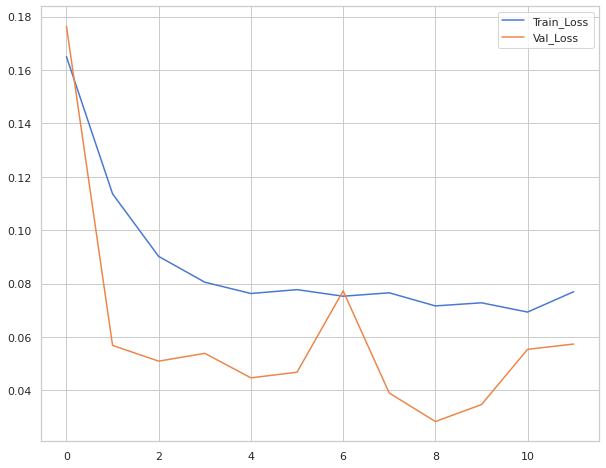

In [111]:
plt.figure(figsize=(10,8))
plt.plot(model.history.history['loss'], label='Train_Loss')
plt.plot(model.history.history['val_loss'], label='Val_Loss')
plt.legend()  # Show the legend
plt.show()

Here we can see that our validation loss was consistently lower than training loss. This means we under-fit on the training data. We can adjust this by tweaking on some of the hyper-parameters like model architecture and batch size and others

Well, we still need to detect anomalies in our test data. So let's make some predictions and calculate the MAE on the training data.

In [112]:
# First let's get some predictions on the training data
X_train_pred = model.predict(X_train)

# Next let's compute the mean absolute error of X_train_pred and X_train.
# MAE is so easy to compute:- find mean of abs(X_train_pred - X_train)
# Let's save it in a Data Frame

train_mae_loss = pd.DataFrame(np.mean(np.abs(X_train_pred - X_train), axis=1), columns=['Errors'])

train_mae_loss.head()

,Errors
0,0.517725
1,0.518227
2,0.519823
3,0.521949
4,0.520541


Next, let's evaluate the model on the test data

In [113]:
model.evaluate(X_test, y_test)

# Model.evaluate shows us the total loss for the predictions. While the MAE we computed above was for each prediction.
# This loss is 0.37 for the test data 

51/51 [==============================] - 0s 4ms/step - loss: 0.3680


0.36795541644096375

Let's see the distribution of the MAE loss for the train data

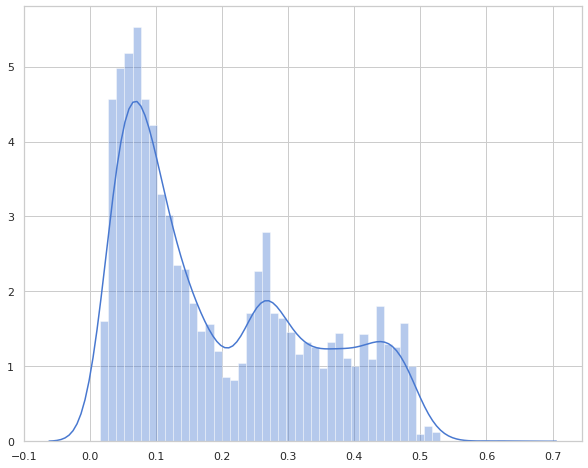

In [114]:
plt.figure(figsize=(10,8))
sns.distplot(train_mae_loss, bins=50, kde=True) # kde is kernel density estimate tht's over laid on the distplot.
plt.show()

Okay, so let's set a threshold of say 0.65 on the x_axis. This means any data above 0.6 is considered and labeled an anomaly

In [115]:
threshold = 0.65

In [116]:
# First let's get some predictions on the testing data
X_test_pred = model.predict(X_test)

# Next let's compute the mean absolute error of X_test_pred and X_test.
# MAE is so easy to compute:- find mean of abs(X_test_pred - X_test)
# Let's save it in a Data Frame

test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=1)

#  Detect Anomalies 
First we build a data frame with the loss and anomaly values(those exceeding the treshold)  
The data will begin after the time steps in the original test data set

In [117]:
test_score_df = pd.DataFrame(test_set[time_steps:])

# First lets add the loss column containing the test_mae_loss
test_score_df['loss'] = test_mae_loss

# Next, we set the threhold column
test_score_df['threshold'] = threshold

# next let's create an is_anomaly column that tells if a loss is above or equal 
# to the threshols set
test_score_df['is_anomaly'] = test_score_df.loss >= test_score_df.threshold

# lastly, let's track the closing prices
test_score_df['close'] = test_set[time_steps:].close

In [118]:
test_score_df.head()

,date,close,loss,threshold,is_anomaly
6583,2012-02-08,1.216856,0.056160,0.65,False
6584,2012-02-09,1.221625,0.056245,0.65,False
6585,2012-02-10,1.199313,0.056122,0.65,False
6586,2012-02-13,1.221194,0.056263,0.65,False
6587,2012-02-14,1.218150,0.054837,0.65,False


In [119]:
# Let's see the last 10 rows
test_score_df.tail()

,date,close,loss,threshold,is_anomaly
8187,2018-06-25,4.493228,0.735808,0.65,True
8188,2018-06-26,4.507583,0.781334,0.65,True
8189,2018-06-27,4.451431,0.791482,0.65,True
8190,2018-06-28,4.491406,0.821036,0.65,True
8191,2018-06-29,4.496343,0.810404,0.65,True


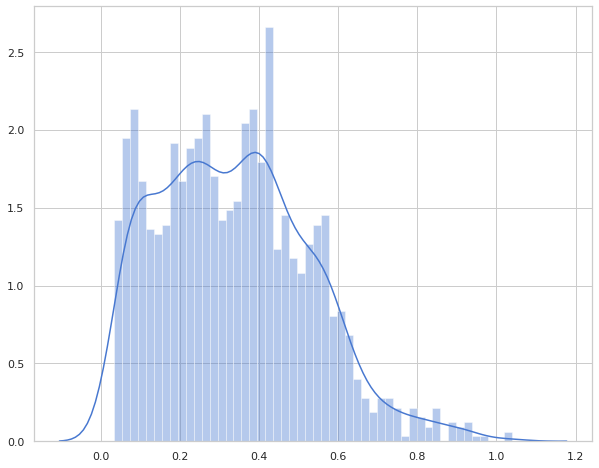

In [120]:
plt.figure(figsize=(10,8))
sns.distplot(test_mae_loss, bins=50, kde=True) # kde is kernel density estimate tht's over laid on the distplot.
plt.show()

In [121]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = test_score_df.date, 
                         y = test_score_df.loss, 
                         mode='lines', 
                         name='Test_Loss'))

# Let's create another line chart to plot the threshold at 0.65
fig.add_trace(go.Scatter(x = test_score_df.date, 
                         y = test_score_df.threshold, 
                         mode='lines', 
                         name='Threshold'))

# Let's update the figure with the legend
fig.update_layout(showlegend=True)
fig.show()

It looks really cool. And seems like we are thresholding extreme values really well. All the values above the threshold are considered anomalies because their reconstruction error esceeds the threshold of 0.65

So let's create a Dataframe with only the extreme values and plot them and explore them with more granularity

In [122]:
anomalies_df = test_score_df[test_score_df.is_anomaly == True]
print(anomalies_df.shape)

(84, 5)


In [123]:
anomalies_df.head()

,date,close,loss,threshold,is_anomaly
7474,2015-08-25,2.457439,0.725614,0.65,True
7475,2015-08-26,2.632149,0.792964,0.65,True
7476,2015-08-27,2.745147,0.701318,0.65,True
7976,2017-08-22,3.859192,0.651471,0.65,True
8089,2018-02-02,4.601217,0.655149,0.65,True


So while plotting the anomalies plot, let's inverse_transform the data back to its original state to see the real value of the plot

In [124]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = test_score_df.date, 
                         y = scaler.inverse_transform(test_score_df.close), 
                         mode='lines', 
                         name='Close_Price'))

# Let's create another line chart to plot the threshold at 0.65
fig.add_trace(go.Scatter(x = anomalies_df.date, 
                         y = scaler.inverse_transform(anomalies_df.close), 
                         mode='markers', 
                         name='Anomalies'))

# Let's update the figure with the legend
fig.update_layout(showlegend=True)
fig.show()

Now we can see clearly what we intended to fulfill in this project.The anomaly data points. we can see that most of the anomalies are concentrated between Feb 2018 and july 2018. Note that we can still adjust the thresholds and other parameters to get better results.

<b><h3>Summary:</b></h3>

We have combined two very powerful concepts in deep learning, 
1. LSTMs
2. Auto-Encoders
And we've combined these two to create an anomaly detection module to predict anomalies in certain price changes in the S&P 500 Index Data.

**Key points:**

1. The three essential components of an Auto-encoder are: 1. The Encoder, 2. The Decoder and 3. the Loss function.

# References:  
    1.https://github.com/Lawrence-Krukrubo/Anomaly_Detection_in_Time_Series_Data_with_Keras/blob/master/anomaly_detection_in_time_series_data_with_keras_and_tensorflow.ipynb